Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5210 - accuracy: 0.8513
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2807 - accuracy: 0.9197
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - accuracy: 0.9265
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2461 - accuracy: 0.9297
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2368 - accuracy: 0.9316
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2296 - accuracy: 0.9336
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2234 - accuracy: 0.9353
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2190 - accuracy: 0.9365
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2158 - accuracy: 0.9373
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2290 

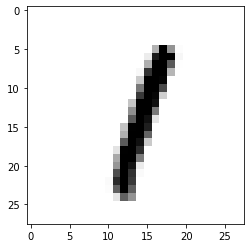

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images.
train_images = (train_images / 255)
test_images = (test_images / 255)



# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#plt.imshow(x_train[1], cmap='gray_r')

plt.imshow(x_test[5], cmap='gray_r')

# Build the model.
model = Sequential([
  Dense(10, activation='relu', input_shape=(784,)),
  #Dense(10, activation='relu'),
  #Dense(10, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

